In [74]:
%matplotlib inline

import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import os
import os.path

In [75]:
scenarios_folder = os.path.expanduser('~/Developer/interscsimulator/mock-simulators/smart_city_model/digital-rails-scenarios/')
dr_events_filename_template = scenarios_folder + '{}/arrivals.xml'

In [76]:
def parse_arrivals(filename, prefix=''):
    tree = ET.parse(filename)
    root = tree.getroot()

    events = []
    for child in root:        
        if (len(prefix) == 0 or (prefix in child.attrib['person'])):
            trip_time = int(child.attrib['trip_time'])
            distance = int(child.attrib['distance'])

            events.append({'trip_time_s': trip_time, 'distance_m': distance})

    return pd.DataFrame(events)

# All cars (DR + regular)

In [77]:
trip_time_stats = []
avg_speed_stats = []


scenarios = [
    'peak_cet_0_0',
    'peak_dr_algo_0_0',
    'peak_dr_algo_1_0',
    'peak_dr_algo_1_5',
    'peak_dr_algo_1_10',
    'peak_dr_algo_1_15',
    'peak_dr_algo_1_20',
    'peak_dr_algo_1_25',
    'peak_dr_algo_1_30',
    'peak_dr_algo_1_35',
    'peak_dr_algo_1_40',
    'peak_dr_algo_1_45',
    'peak_dr_algo_1_50',
    'peak_dr_algo_1_55',
    'peak_dr_algo_1_60',
    'peak_dr_algo_1_65',
    'peak_dr_algo_1_70',
    'peak_dr_algo_1_75',
    'peak_dr_algo_1_80',
    'peak_dr_algo_1_85',
    'peak_dr_algo_1_90',
    'peak_dr_algo_1_95',
    'peak_dr_algo_1_100'
]

for s in scenarios:
    dr = parse_arrivals(dr_events_filename_template.format(s))
    dr['avg_speed_km/h'] = 3.6 * dr['distance_m'] / dr['trip_time_s']
    dr = dr.drop(columns='distance_m')
    
    trip_time_stats.append(dr['trip_time_s'].describe(percentiles=[.01,.25,.5,.75,.99]))
    avg_speed_stats.append(dr['avg_speed_km/h'].describe(percentiles=[.01,.25,.5,.75,.99]))
    
time_df = pd.concat(trip_time_stats, axis=1, keys=scenarios)
speed_df = pd.concat(avg_speed_stats, axis=1, keys=scenarios)

## Trip time

In [78]:
time_df.T[['mean', 'std', 'min', '50%', '99%', 'max']]

,mean,std,min,50%,99%,max
peak_cet_0_0,526.269996,86.078643,334.0,526.0,698.00,763.0
peak_dr_algo_0_0,515.253778,131.774201,248.0,490.0,750.00,795.0
peak_dr_algo_1_0,1068.954478,481.235543,253.0,787.5,1861.00,1928.0
peak_dr_algo_1_5,870.638208,347.409901,191.0,756.0,1612.00,1648.0
peak_dr_algo_1_10,711.265732,262.259086,191.0,657.0,1067.00,1161.0
peak_dr_algo_1_15,645.069819,261.122104,191.0,617.0,1067.87,1205.0
peak_dr_algo_1_20,554.615513,261.575066,191.0,482.0,958.00,1088.0
peak_dr_algo_1_25,501.909913,252.198274,191.0,445.0,932.00,962.0
peak_dr_algo_1_30,500.961581,246.967714,191.0,518.0,914.00,955.0
peak_dr_algo_1_35,372.016630,148.804752,191.0,392.0,650.89,743.0


## Highlights

- With 25% of vehicles using DRs, the global average trip time is 502s, 95% of the current average of 526s 
- With 75% of vehicles using DRs, the global average trip time is 219s, 41% of the current average of 526s
- With 45% of vehicles using DRs, 99% of all trips have time below 515s, which is less than the current average of 526s


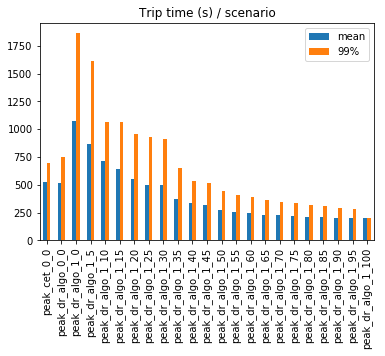

In [79]:
time_df.T[['mean', '99%']].plot(kind='bar', title='Trip time (s) / scenario')

## Average speed

In [80]:
speed_df.T[['mean', 'std', 'min', '1%', '50%', 'max']]

,mean,std,min,1%,50%,max
peak_cet_0_0,19.032464,2.838570,12.427785,14.549356,18.592941,29.824047
peak_dr_algo_0_0,20.479465,6.032993,11.927547,12.643200,19.796242,40.197628
peak_dr_algo_1_0,11.425029,5.509925,4.918257,5.095325,12.680798,38.965517
peak_dr_algo_1_5,14.262193,9.474494,5.753883,5.882382,13.276762,49.646073
peak_dr_algo_1_10,17.544582,11.605942,8.167442,8.886973,15.339367,49.646073
peak_dr_algo_1_15,19.962456,13.178298,7.869212,8.879733,16.376812,49.646073
peak_dr_algo_1_20,23.687055,14.087135,8.715441,9.898121,20.840440,49.646073
peak_dr_algo_1_25,26.226166,14.675584,9.856965,10.174249,22.751678,49.646073
peak_dr_algo_1_30,26.747096,15.653888,9.929215,10.374617,19.371429,49.646073
peak_dr_algo_1_35,31.649440,13.813479,12.762315,14.568364,25.681818,49.646073


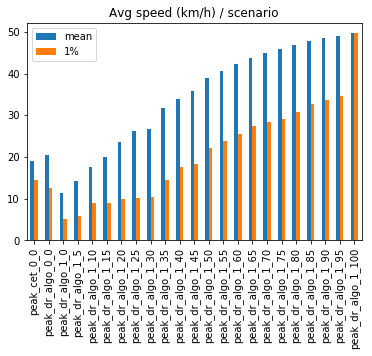

In [81]:
speed_df.T[['mean', '1%']].plot(kind='bar', title='Avg speed (km/h) / scenario')

# Cars outside DR

In [82]:
trip_time_stats = []
avg_speed_stats = []

scenarios = [
    'peak_cet_0_0',
    'peak_dr_algo_0_0',
    'peak_dr_algo_1_0',
    'peak_dr_algo_1_5',
    'peak_dr_algo_1_10',
    'peak_dr_algo_1_15',
    'peak_dr_algo_1_20',
    'peak_dr_algo_1_25',
    'peak_dr_algo_1_30',
    'peak_dr_algo_1_35',
    'peak_dr_algo_1_40',
    'peak_dr_algo_1_45',
    'peak_dr_algo_1_50',
    'peak_dr_algo_1_55',
    'peak_dr_algo_1_60',
    'peak_dr_algo_1_65',
    'peak_dr_algo_1_70',
    'peak_dr_algo_1_75',
    'peak_dr_algo_1_80',
    'peak_dr_algo_1_85',
    'peak_dr_algo_1_90',
    'peak_dr_algo_1_95',
]

for s in scenarios:
    dr = parse_arrivals(dr_events_filename_template.format(s), 'regular')
    dr['avg_speed_km/h'] = 3.6 * dr['distance_m'] / dr['trip_time_s']
    dr = dr.drop(columns='distance_m')
    
    trip_time_stats.append(dr['trip_time_s'].describe(percentiles=[.01,.25,.5,.75,.99]))
    avg_speed_stats.append(dr['avg_speed_km/h'].describe(percentiles=[.01,.25,.5,.75,.99]))
    
time_df = pd.concat(trip_time_stats, axis=1, keys=range(0, 101, 5))
speed_df = pd.concat(avg_speed_stats, axis=1, keys=range(0, 101, 5))

## Trip time

In [83]:
time_df.T[['mean', 'std', 'min', '50%', '99%', 'max']]

,mean,std,min,50%,99%,max
0,526.269996,86.078643,334.0,526.0,698.00,763.0
5,515.253778,131.774201,248.0,490.0,750.00,795.0
10,1068.954478,481.235543,253.0,787.5,1861.00,1928.0
15,905.795111,319.482522,253.0,773.0,1613.00,1648.0
20,767.700799,210.046659,249.0,698.0,1068.18,1161.0
25,723.076773,197.528111,254.0,648.0,1081.00,1205.0
30,642.102074,214.976383,254.0,586.0,962.00,1088.0
35,602.886704,208.997167,254.0,506.0,935.00,962.0
40,630.392678,175.639659,252.0,596.0,918.04,955.0
45,465.583664,93.993235,253.0,456.0,660.00,743.0


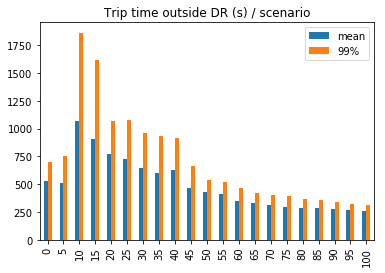

In [84]:
time_df.T[['mean', '99%']].plot(kind='bar', title='Trip time outside DR (s) / scenario')

## Average speed

In [85]:
speed_df.T[['mean', 'std', 'min', '1%', '50%', 'max']]

,mean,std,min,1%,50%,max
0,19.032464,2.838570,12.427785,14.549356,18.592941,29.824047
5,20.479465,6.032993,11.927547,12.643200,19.796242,40.197628
10,11.425029,5.509925,4.918257,5.095325,12.680798,38.965517
15,12.416238,5.073759,5.753883,5.878735,12.903658,39.882353
20,14.022595,4.904225,8.167442,8.877157,14.125000,40.843373
25,14.795863,4.889210,7.869212,8.771878,15.479452,38.965517
30,17.338738,6.478771,8.715441,9.856965,17.006689,39.418605
35,18.472742,6.715911,9.856965,10.141604,19.633205,40.039370
40,17.001947,5.601216,9.929215,10.328962,16.783009,40.357143
45,22.031779,5.234022,12.762315,14.367273,21.276151,38.965517


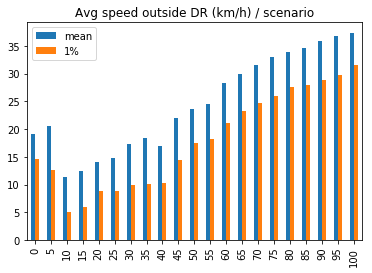

In [86]:
speed_df.T[['mean', '1%']].plot(kind='bar', title='Avg speed outside DR (km/h) / scenario')